
# Feature Task 2

## Requirement

    1. Open any image;
    2. Use Sobel to find the horizontal and vertical gradients;
    3. Create an edge mask using Canny (255 for edges 0 for not);
    4. On the edges, show the magnitude of the gradients.

    Advanced Task:
    1. Devise a way to visualise the direction of the gradients on the edges.


In [9]:
# Import libraries

%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui

<function matplotlib.pyplot.show(close=None, block=None)>

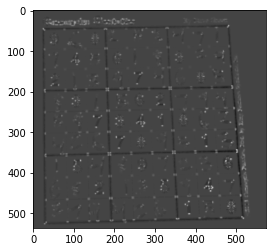

In [10]:
I = cv2.imread('res\sudoku.jpg')

G = cv2.cvtColor(src = I, code = cv2.COLOR_BGR2GRAY)

H = cv2.cornerHarris(G,blockSize=5,ksize=3,k=0.04)

#_, B = cv2.threshold(H,0,255,cv2.THRESH_BINARY)
#V = cv2.bitwise_and(I,I,mask = B)
V = cv2.cvtColor(H,cv2.COLOR_GRAY2BGR)
plt.imshow(H, cmap = 'gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

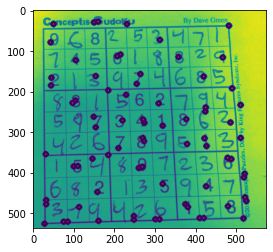

In [34]:
Corners = cv2.goodFeaturesToTrack(G,maxCorners=50, qualityLevel=0.1,minDistance=45)
for pts in Corners:
    S = cv2.circle(G,tuple(pts[0]),5,(0,0,255),5)
plt.imshow(S)
plt.show


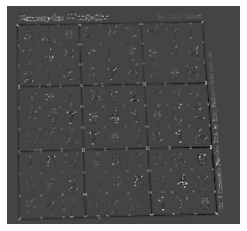

In [53]:
import sys
plt.imshow(H, cmap = 'gray', interpolation='nearest',aspect='equal')
plt.axis('off')
plt.savefig('res\Test.jpg',bbox_inches='tight',pad_inches = 0,dpi = 100)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

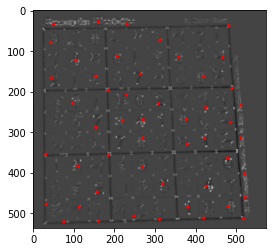

In [63]:
T = cv2.imread('res\Test.jpg')

#Corners = cv2.goodFeaturesToTrack(G,maxCorners=50, qualityLevel=0.1,minDistance=10)
for pts in Corners:
    S = cv2.circle(T,tuple(pts[0]),1,(0,0,255),5)
plt.imshow(cv2.cvtColor(S,cv2.COLOR_BGR2RGB))
plt.show

In [55]:
T.shape

(302, 323, 3)

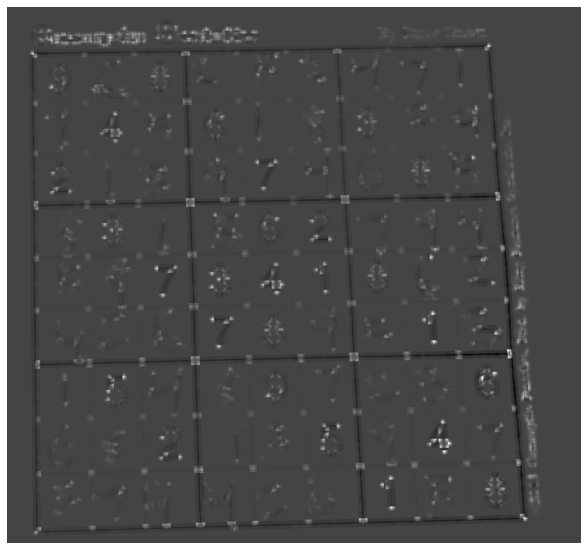

In [62]:
import matplotlib as mpl

def display_image_in_actual_size(im_path):

    dpi = mpl.rcParams['figure.dpi']
    im_data = im_path
    height, width= im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')
    plt.savefig('res\Test.jpg')
    plt.show()

display_image_in_actual_size(H)